In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis
import statsmodels.api as sm

In [26]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ASUS\Downloads\advertising.csv")

In [27]:
import os
os.listdir()

['.anaconda',
 '.bash_history',
 '.codeium',
 '.conda',
 '.continuum',
 '.gitconfig',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.python_history',
 '.ssh',
 '.vscode',
 '.windsurf',
 'anaconda3',
 'AppData',
 'Application Data',
 'chenku_p',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'Favorites',
 'Links',
 'Local Settings',
 'miniforge3',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{965dab4e-a322-11f0-8520-8a500ea84b1f}.TM.blf',
 'NTUSER.DAT{965dab4e-a322-11f0-8520-8a500ea84b1f}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{965dab4e-a322-11f0-8520-8a500ea84b1f}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'PrintHood',
 'Recent',
 'sales_prediction.ipynb',
 'Saved Games',
 'Searches',
 'SendTo',
 'Start Menu',
 'Templates',
 'Titanic_Survival_Prediction.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Untitled3.ipynb

In [28]:
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [29]:
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [30]:
df.shape

(200, 4)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [32]:
df.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [33]:
print("Skewness")

print("TV:", round(skew(df['TV'], bias=True), 4))
print("Radio:", round(skew(df['Radio'], bias=True), 4))
print("Newspaper:", round(skew(df['Newspaper'], bias=True), 4))
print("Sales:", round(skew(df['Sales'], bias=True), 4))

Skewness
TV: -0.0693
Radio: 0.0935
Newspaper: 0.888
Sales: -0.0732


In [34]:
print("Kurtosis")

print("TV")
print(round(kurtosis(df['TV'], axis=0, bias=True), 4))

print("Radio")
print(round(kurtosis(df['Radio'], axis=0, bias=True), 4))

print("Newspaper")
print(round(kurtosis(df['Newspaper'], axis=0, bias=True), 4))

print("Sales")
print(round(kurtosis(df['Sales'], axis=0, bias=True), 4))

Kurtosis
TV
-1.2259
Radio
-1.259
Newspaper
0.6035
Sales
-0.654


In [35]:
df.isnull().sum()*100/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

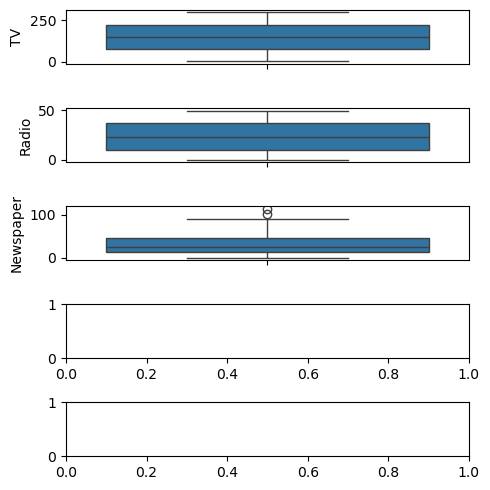

In [36]:
fig, axs = plt.subplots(5, figsize=(5, 5))
plt1=sns.boxplot(df['TV'], ax=axs[0])
plt2=sns.boxplot(df['Radio'], ax=axs[1])
plt3=sns.boxplot(df['Newspaper'], ax=axs[2])
plt.tight_layout()

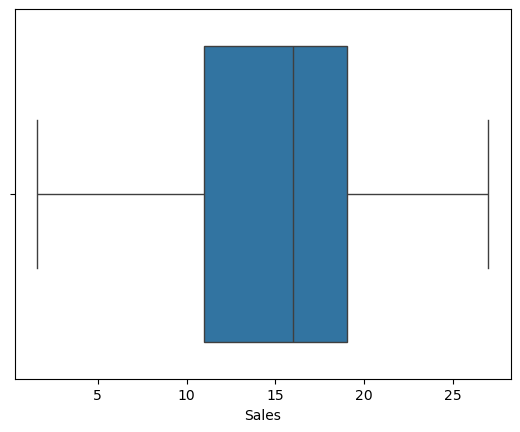

In [37]:
sns.boxplot(x=df['Sales'])
plt.show()

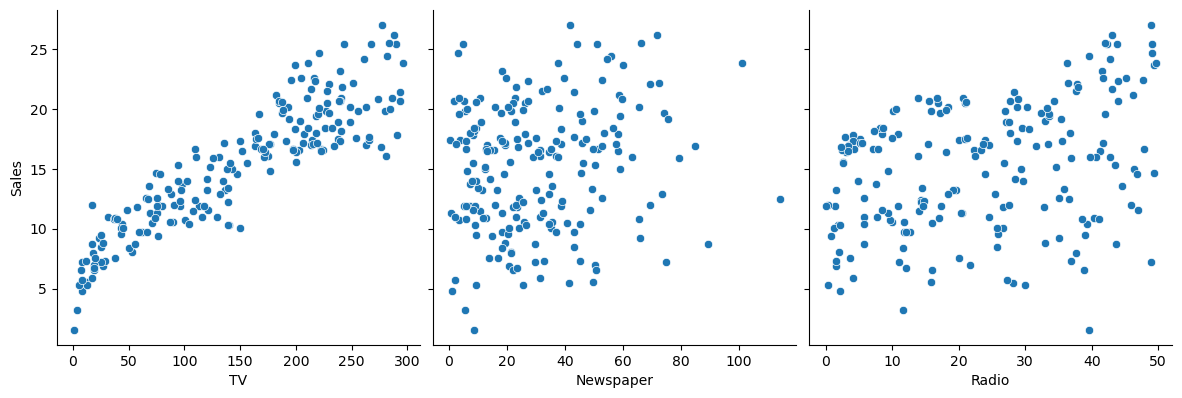

In [38]:
sns.pairplot(
    df,
    x_vars=['TV', 'Newspaper', 'Radio'],
    y_vars='Sales',
    height=4,
    aspect=1,
    kind='scatter'
)
plt.show()

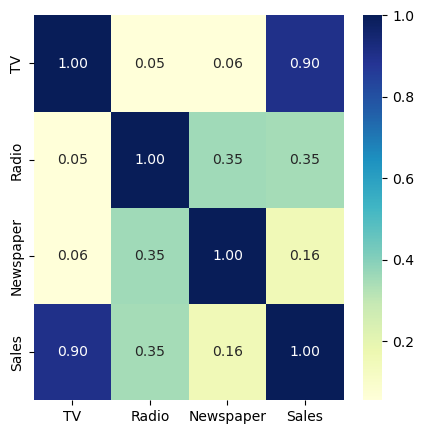

In [39]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

In [40]:
x=df['TV']
y=df['Sales']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [42]:
x_train.head()


169    284.3
97     184.9
31     112.9
12      23.8
35     290.7
Name: TV, dtype: float64

In [43]:
y_train.head()

169    20.0
97     20.5
31     11.9
12      9.2
35     17.8
Name: Sales, dtype: float64

In [44]:
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train, x_train_sm).fit()

In [45]:
lr.params

const    7.206555
TV       0.054835
dtype: float64

In [46]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     550.7
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           5.08e-50
Time:                        17:14:12   Log-Likelihood:                -314.94
No. Observations:                 140   AIC:                             633.9
Df Residuals:                     138   BIC:                             639.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2066      0.414     17.392      0.0

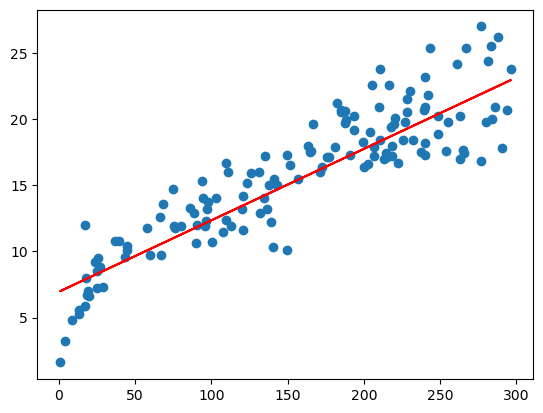

In [23]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()